In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile

from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
kaggle_credentials=json.load(open('kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
with ZipFile('plantvillage-dataset.zip','r') as zip_ref:
  zip_ref.extractall()


In [ ]:
print(os.listdir('plantvillage dataset'))


In [ ]:
print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

In [ ]:
print(len(os.listdir('plantvillage dataset/color/Strawberry___healthy')))
print(os.listdir('plantvillage dataset/color/Strawberry___healthy'))

In [ ]:
import matplotlib.image as mpimg


image_path='/content/plantvillage dataset/color/Apple___Apple_scab/0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG'
image=mpimg.imread(image_path)
plt.imshow(image)
plt.show()

In [ ]:
# image.shape
type(image)
image

In [ ]:
img_size=224
batch_size=32

In [ ]:
data_gen=ImageDataGenerator(rescale=1./255,
                            validation_split=0.2)

In [ ]:
base_dir='plantvillage dataset/color'
train_gen=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size)
,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'

    )

In [ ]:
base_dir='plantvillage dataset/color'
validation_gen=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size)
,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'

    )

In [ ]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_gen.num_classes,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_gen,
                  steps_per_epoch=train_gen.samples//batch_size,
                  epochs=5,
                  validation_data=validation_gen,
                  validation_steps=validation_gen.samples//batch_size)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 123s 85ms/step - accuracy: 0.6051 - loss: 1.8670 - val_accuracy: 0.8592 - val_loss: 0.4384
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.8633
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 102s 75ms/step - accuracy: 0.9202 - loss: 0.2567 - val_accuracy: 0.8713 - val_loss: 0.4113
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.9659 - loss: 0.1072 - val_accuracy: 0.8733 - val_loss: 0.4593


In [ ]:
print(validation_gen.samples)
print(train_gen.samples)

10849
43456


In [ ]:
print("Evaluating model..")
val_loss,val_acc=model.evaluate(validation_gen,steps=validation_gen.samples//batch_size)

print(f"validation Accuracy:{val_acc*100:.2f}%")

Evaluating model..
339/339 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8744 - loss: 0.4515
validation Accuracy:87.33%


In [ ]:
# train_gen

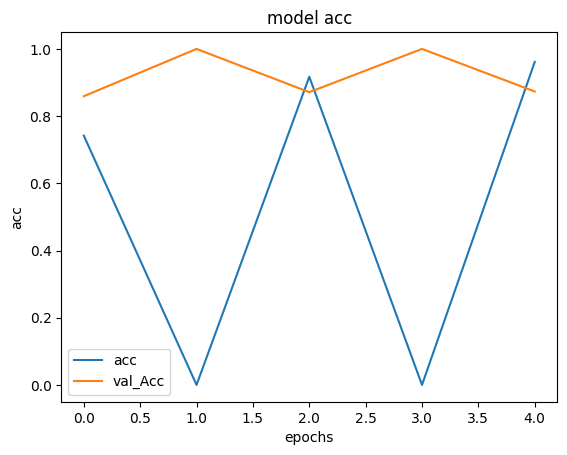

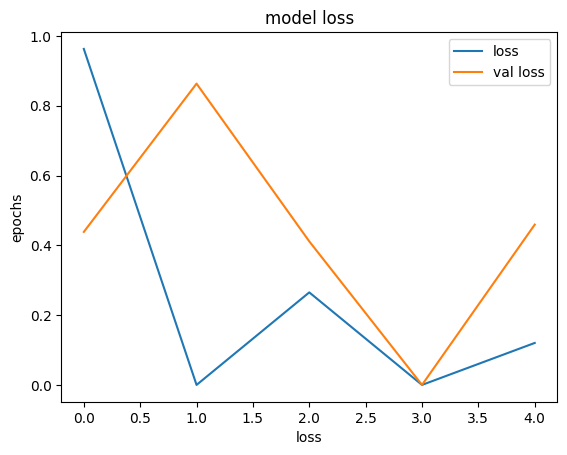

In [ ]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_Acc')
plt.legend()
plt.title("model acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.title("model loss")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.show()



In [ ]:
def load_and_preprocess(image_path,target_size=(224,224)):
  img=Image.open(image_path)
  img=img.resize(target_size)
  img_array=np.array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=img_array.astype('float32')/255
  return img_array


def predict_image(image_path,model,class_indices):
  preprocessed_img=load_and_preprocess(image_path)
  pred=model.predict(preprocessed_img)

  pred_class=np.argmax(pred,axis=1)
  class_name=class_indices[pred_class[0]]
  return class_name

In [ ]:
class_indices={v:k for k,v in train_gen.class_indices.items()}

In [ ]:
train_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
json.dump(class_indices,open('class_indices.json','w'))


In [ ]:
image_path=input("enter path of the leaf image to predict")

predicted_class=predict_image(image_path,model,class_indices)
predicted_class

enter path of the leaf image to predict/content/images (4).jfif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


'Tomato___Septoria_leaf_spot'